# Healthylife insurance charge prediction - Project 2

## Problem Statement
HealthyLife is a leading insurance company headquartered in New York City, serving customers nationwide with a range of insurance policies, including health, auto, and life insurance. Currently, the company relies on traditional methods to assess insurance charges based on customer details such as age, sex, and BMI. However, they face challenges in accurately predicting insurance charges due to limited insights into how different customer attributes impact premiums. This uncertainty leads to potential underpricing or overpricing of policies, affecting both profitability and customer satisfaction. To address these challenges, the company is looking to leverage advanced predictive modeling techniques to enhance its insurance charge estimation process and provide more accurate and personalized pricing to customers.

## Objective
As a Data Scientist hired by the insurance company, the objective is to develop an app and implement a predictive model for estimating insurance charges based on customer attributes. The primary challenges to solve include improving the accuracy of insurance charge predictions by incorporating various customer attributes, streamlining the underwriting process to enhance efficiency and customer experience, and maintaining regulatory compliance while optimizing pricing strategies also analyze and identify the driftness in model and data to understand the model behavior overtime

By achieving these objectives


*   We aim to achieve more accurate and personalized insurance charge estimations
*   Reducing the risks of underpricing and overpricing
*   Improve customer satisfaction and loyalty through fair and competitive pricing
*   Ensuring transparency and compliance with regulatory requirements in pricing strategies will further strengthen our competitive position in the market and enhance overall business performance









### Import the required libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import sklearn
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Fetching dataset from sklearn's openml module
from sklearn.datasets import fetch_openml

# Importing preprocessing modules from sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Importing make_pipeline function from pipeline module
from sklearn.pipeline import make_pipeline

# Importing train_test_split and RandomizedSearchCV from model_selection module
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Importing LogisticRegression model and evaluation metrics from linear_model and metrics modules
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# Configure scikit-learn to display pipeline diagrams for visualizing the structure of machine learning pipelines
sklearn.set_config(display='diagram')

## Import the Data

In [3]:
# Read the data
data_df = pd.read_csv("insurance.csv")

In [4]:
data_df.sample(5)

,index,age,sex,bmi,children,smoker,region,charges
111,111,55,female,29.700,2,no,southwest,11881.35800
44,44,38,male,37.050,1,no,northeast,6079.67150
786,786,60,male,36.955,0,no,northeast,12741.16745
318,318,44,female,27.645,0,no,northwest,7421.19455
923,923,34,male,35.815,0,no,northwest,4320.41085


In [5]:
# Print the top 5 rows from the data
data_df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


# Data Description

* Index: Unique identifier for each record in the dataset
* age: Age os the customer
* bmi: Body Mass Index (BMI) of the customer
* children: Number of children/dependents covered by the insurance
* smoker: Indicates if the customer is a smoker (yes or no)
* region: Geographic region of the customer (e.g., northwest, southeast, southwest, northeast)
* charges: Estimated insurance charges for the customer based on the provided details  

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [7]:
# Get the column names in the dataset
data_df.columns

Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [8]:
target = 'charges'
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker','region']

In [9]:
# Get the shape of the data
data_df.shape

(1338, 8)

In [10]:
# Check is there any missing values iin the dataset
data_df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Store the numerical features in a new varable called numerical_features
numerical_features =data_df[['age', 'bmi', 'children']].columns

In [12]:
numerical_features

Index(['age', 'bmi', 'children'], dtype='object')

In [13]:
# Store the categorical features in a new varable called categorical_features
categorical_features = data_df.select_dtypes(include=['object']).columns

In [14]:
categorical_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
# Get the count of the children
data_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [16]:
# split data in to numerical and categorical
numerical_cols = data_df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = data_df.select_dtypes(include=["object"]).columns

# Create separate dataframes for numerical and categorical data
numerical_data = data_df[numerical_cols]
categorical_data = data_df[categorical_cols]

In [17]:
numerical_data

,index,age,bmi,children,charges
0,0,19,27.900,0,16884.92400
1,1,18,33.770,1,1725.55230
2,2,28,33.000,3,4449.46200
3,3,33,22.705,0,21984.47061
4,4,32,28.880,0,3866.85520
...,...,...,...,...,...
1333,1333,50,30.970,3,10600.54830
1334,1334,18,31.920,0,2205.98080
1335,1335,18,36.850,0,1629.83350
1336,1336,21,25.800,0,2007.94500


In [18]:
categorical_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


# Display the statistical summary of the numerical, categorical and target data

In [19]:
# Display statistical summary of numerical data
numerical_summary = numerical_data.describe()
print("Statistical summary of numerical data:")
print(numerical_summary)

Statistical summary of numerical data:
             index          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     334.250000    27.000000    26.296250     0.000000   4740.287150
50%     668.500000    39.000000    30.400000     1.000000   9382.033000
75%    1002.750000    51.000000    34.693750     2.000000  16639.912515
max    1337.000000    64.000000    53.130000     5.000000  63770.428010


In [20]:
# Display statistical summary of categorical data
categorical_summary = categorical_data.describe(include="all")
print("\nStatistical summary of categorical data:")
print(categorical_summary)


Statistical summary of categorical data:
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [21]:
# Display statistical summary of target data
target_data = data_df["charges"]
target_summary = target_data.describe()
print("\nStatistical summary of target data:")
print(target_summary)


Statistical summary of target data:
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


#### Write your insights and findings from the statistical summary

Based on the statistical summary of the data, here are some insights and findings:

#### Numerical Data:

* -- Age: The data ranges from the minimum age of 19 to the maximum age, indicating a diverse age group in the dataset.
* -- BMI: The BMI values range from the minimum to the maximum, indicating variations in body mass index among the individuals.
* -- Children: The number of children ranges from 0 to the maximum, suggesting a mix of individuals with and without children.
* -- Charges: The charges vary significantly, with a range from the minimum to the maximum value. Further analysis is needed to understand the factors influencing these charges.

#### Categorical Data:

* -- Sex: The dataset includes both male and female individuals, with no missing values.
* -- Smoker: The dataset contains information about smoking habits, with 'yes' indicating smokers and 'no' indicating non-smokers.
* -- Region: The dataset includes individuals from different regions, namely 'southwest', 'southeast', 'northwest', and 'northeast'.

#### Target Data:

* -- Charges: The charges variable represents the insurance charges for individuals. The statistical summary provides information about the minimum, maximum, mean, and quartile values, giving an overview of the distribution of insurance charges.



In [22]:
# Check for missing values
missing_values = data_df.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [23]:
# Check for duplicated rows
duplicated_rows = data_df[data_df.duplicated()]

# Print the duplicated rows
print("Duplicated rows:")
print(duplicated_rows)

Duplicated rows:
Empty DataFrame
Columns: [index, age, sex, bmi, children, smoker, region, charges]
Index: []


In [24]:
data_df.duplicated().sum()

0

In [25]:
# display the info of the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [26]:
# drop the columns which was not required for modelling
# List of columns to drop
columns_to_drop = ['index']

# Drop the columns
data_df = data_df.drop(columns=columns_to_drop)

# Display the modified DataFrame
print(data_df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


## Exploratory data analysis

#### Charges amount distribution per sex

<Axes: title={'center': 'Distribution of Charges by Sex'}, xlabel='Charges', ylabel='Frequency'>

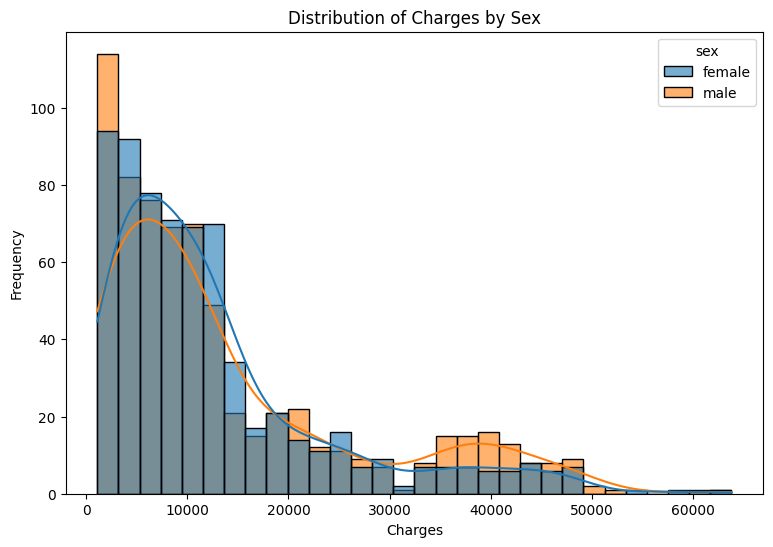

In [27]:
# Display a histogram to visualize the distribution of charges based on sex in the dataset
# Filter the data by sex
plt.figure(figsize=(9,6))
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges by Sex')

sns.histplot(data_df, x='charges',hue="sex", kde=True, alpha=0.6, linewidth=1)

It appears that the charges for males and females are the same; however, there are more males then females with chages exceeding $3200

#### Distribution of Age

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Frequency'>

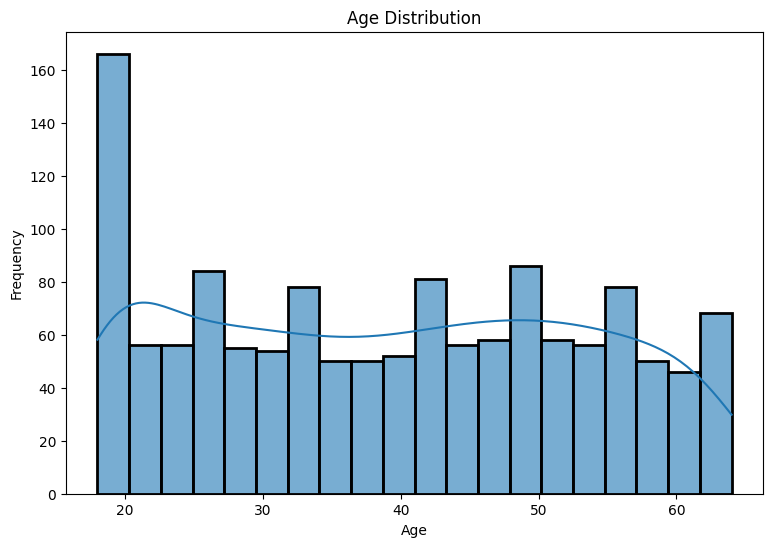

In [28]:
# Create a histogram to display the age distribution in the dataset
plt.figure(figsize=(9,6))
# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
sns.histplot(data_df, x='age', kde=True, alpha=0.6, bins=20, linewidth=2)

#### Charges amount distribution per smoker

<Axes: title={'center': 'Distribution of Charges by Smoking Status'}, xlabel='Charges', ylabel='Frequency'>

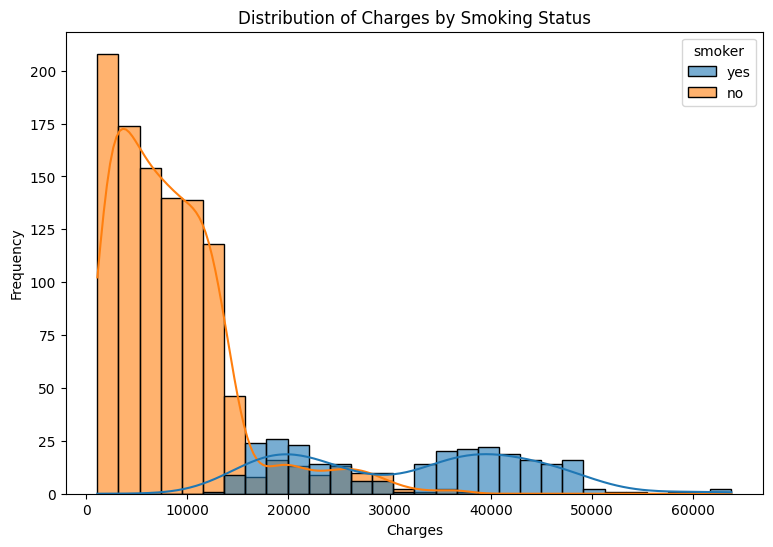

In [29]:
# Show a histogram to visualize the distribution of charges amounts based on smoking status in the dataset
plt.figure(figsize=(9,6))
# Set plot labels and title
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges by Smoking Status')


sns.histplot(data_df, x='charges', hue="smoker", kde=True, alpha=0.6, linewidth=1)

#### Average BMI per age

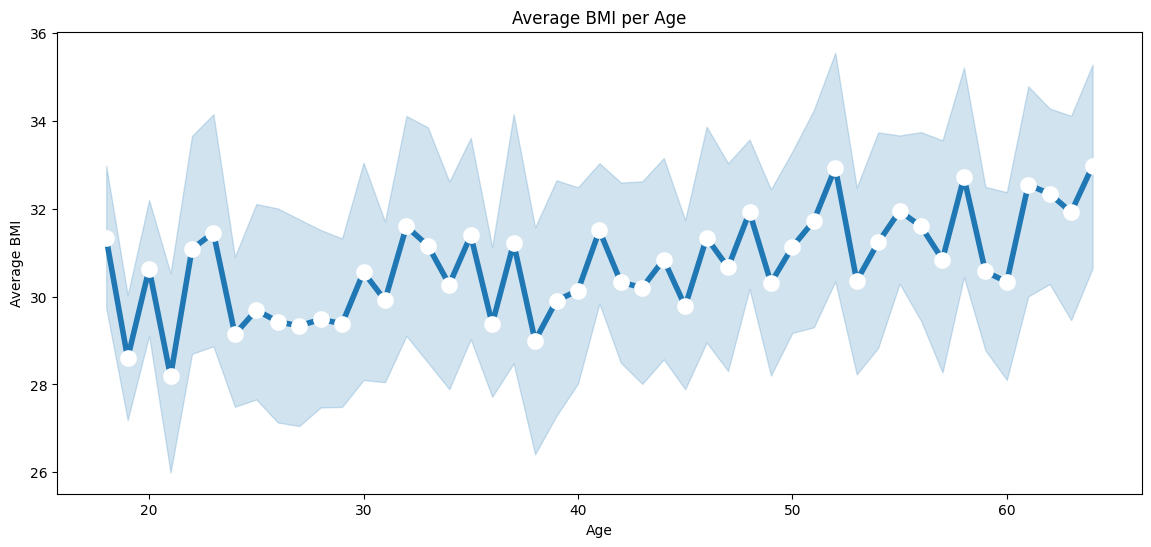

In [30]:
# Display a line plot showing the average BMI per age using markers to highlight the data points
plt.figure(figsize=(14,6))
sns.lineplot(data_df, x='age', y='bmi',  marker='o', linewidth=4, markersize=10, markerfacecolor="white", markeredgewidth=2)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.title('Average BMI per Age')
plt.style.use("ggplot")
# Show the plot
plt.show()

As we can see with time - the average BMI score starts getting higher to unhealthier ranges.

#### Age vs charges

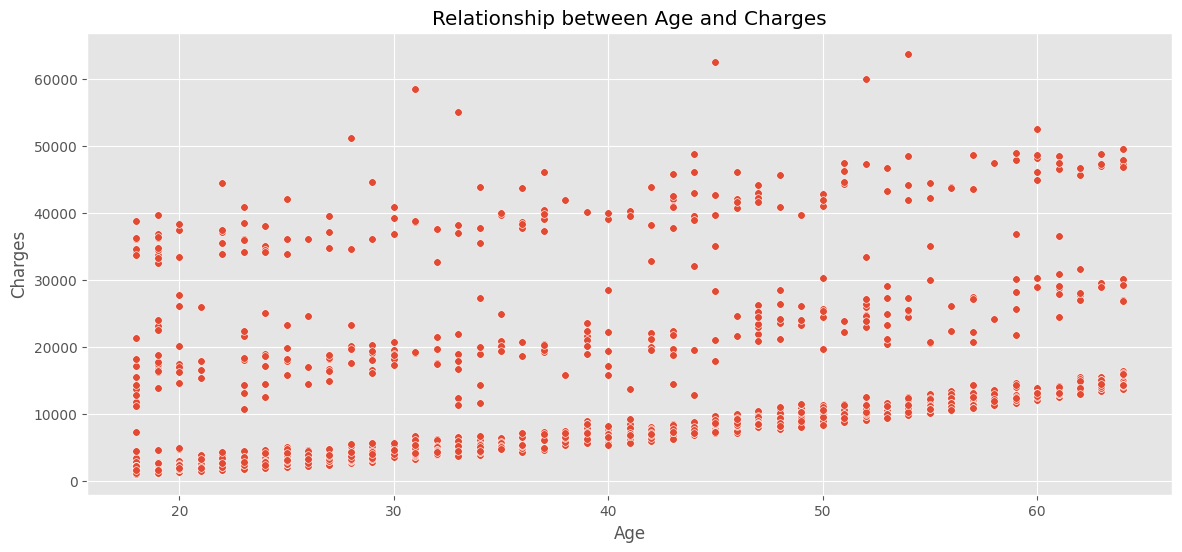

In [31]:
# Create a scatter plot to show the relationship between age and charges in the dataset.
plt.figure(figsize=(14,6))
sns.scatterplot(data_df, x='age', y='charges', s=30)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.style.use("ggplot")
# Show the plot
plt.show()

## Model Estimation

In [32]:
categorical_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [33]:
numerical_features

Index(['age', 'bmi', 'children'], dtype='object')

In [34]:
target = 'charges'
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker','region']

In [35]:
X = data_df[numeric_features + categorical_features]
y = data_df[target]

In [36]:
# Split the data into training and testing sets
# Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the independenet and dependent features in to x and y variables with a test size 0.2% and random at 42
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


This code creates a pipeline named numerical_pipeline to process numerical features. It consists of two steps:

'imputer': Imputes missing values using the mean strategy with SimpleImputer.

'scaler': Standardizes the numerical features using StandardScaler.

In [37]:
# Creating a pipeline for categorical feature processing, including imputation of missing values with the most frequent value and one-hot encoding with handling of unknown categories.
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

This code constructs a pipeline named categorical_pipeline for processing categorical features, involving imputation of missing values using the most frequent value and one-hot encoding with handling of unknown categories.

In [38]:
# Creating a column transformer named preprocessor to apply specific pipelines to numerical and categorical features separately.
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown='ignore'), categorical_features)
)

In [39]:
# Creating a Linear regression model with parallel processing enabled (-1 indicates using all available cores) for improved training efficiency.
model_linear_regression = LinearRegression(n_jobs=-1)

In [40]:
# Creating a pipeline combining preprocessing steps (imputation and encoding) with logistic regression modeling.
model_pipeline = make_pipeline(
    preprocessor,  # Applying preprocessing steps
    model_linear_regression  # Training logistic regression model
)

In [41]:
# Fit the model on training data
model_pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression(n_jobs=-1))])

## Model Evaluation

In [42]:
# Make predictions on the testing data
model_pipeline.predict(Xtest)

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [43]:
# Evaluate the model using mean squared error
print(f"RMSE: {mean_squared_error(ytest, model_pipeline.predict(Xtest), squared=False)}")

RMSE: 5796.284659276274


In [44]:
# Evaluate the model using R-squared score
print(f"R-squared: {r2_score(ytest, model_pipeline.predict(Xtest))}")

R-squared: 0.7835929767120722


## Serialization

In [45]:
# Display information about the scikit-learn package
print("Scikit-learn version:", sklearn.__version__)

# Display scikit-learn package information
print(sklearn)

Scikit-learn version: 1.2.2
<module 'sklearn' from '/usr/local/lib/python3.10/dist-packages/sklearn/__init__.py'>


In [46]:
# This command displays information about the installed version of the scikit-learn library.
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [47]:
# Generate a requirements.txt file for the project's dependencies
%%writefile requirements.txt
scikit-learn==1.2.2

Writing requirements.txt


In [48]:
%%writefile train.py
import pandas as pd
import joblib

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the data
data_df = pd.read_csv("insurance.csv")

target = 'charges'
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker','region']

print("Creating data subsets")

X = data_df[numeric_features + categorical_features]
y = data_df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown='ignore'), categorical_features)
)

model_linear_regression = LinearRegression(n_jobs=-1)

print("Estimating Model Pipeline")

model_pipeline = make_pipeline(
    preprocessor,
    model_linear_regression
)

model_pipeline.fit(Xtrain, ytrain)

print("Logging Metrics")
print(f"R-squared: {r2_score(ytest, model_pipeline.predict(Xtest))}")

print("Serializing Model")

saved_model_path = "model.joblib"

joblib.dump(model_pipeline, saved_model_path)


Writing train.py


In [49]:
# Execute the training script
# Run the script
!python train.py

Creating data subsets
Estimating Model Pipeline
Logging Metrics
R-squared: 0.7835929767120722
Serializing Model


## Test Predictions

In [50]:
# write you are code here
# Load the saved model
saved_model = joblib.load("model.joblib")

In [51]:
# Get the architecture of saved model
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression(n_jobs=-1))])

In [52]:
saved_model.predict(Xtest)

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

# Gradio Interface

In [53]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("insurance.csv")

# Get distinct values for each column
distinct_values = {}
for column in df.columns:
    distinct_values[column] = df[column].unique()

# Print distinct values for each column
for column, values in distinct_values.items():
    print(f"Distinct values for column '{column}':")
    print(values)
    print()

Distinct values for column 'index':
[   0    1    2 ... 1335 1336 1337]

Distinct values for column 'age':
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

Distinct values for column 'sex':
['female' 'male']

Distinct values for column 'bmi':
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46

In [54]:
%%writefile app.py
# Import the libraries
import os
import uuid
import joblib
import json

import gradio as gr
import pandas as pd

from huggingface_hub import CommitScheduler
from pathlib import Path


# Run the training script placed in the same directory as app.py
# The training script will train and persist a linear regression
# model with the filename 'model.joblib'

os.system("pyhton train.py")

# Load the freshly trained model from disk
insurance_charges_predictor = joblib.load('model.joblib')

# Prepare the logging functionality
log_file = Path("logs/") / f"data_{uuid.uuid4()}.json"
log_folder = log_file.parent

scheduler = CommitScheduler(
    repo_id="insurance-charge-mlops-logs",  # provide a name "insurance-charge-mlops-logs" for the repo_id
    repo_type="dataset",
    folder_path=log_folder,
    path_in_repo="data",
    every=2
)

# Define the predict function which will take features, convert to dataframe and make predictions using the saved model
# the functions runs when 'Submit' is clicked or when a API request is made


def predict_insurance_charge(age, bmi, children, sex, smoker, region):
    sample = {
        'age': age,
        'bmi': bmi,
        'children': children,
        'sex': sex,
        'smoker': smoker,
        'region': region
    }
    data_point = pd.DataFrame([sample])
    prediction = insurance_charges_predictor.predict(data_point).tolist()


    # While the prediction is made, log both the inputs and outputs to a  log file
    # While writing to the log file, ensure that the commit scheduler is locked to avoid parallel
    # access

    with scheduler.lock:
        with log_file.open("a") as f:
            f.write(json.dumps(
                {
                    'age': age,
                    'bmi': bmi,
                    'children': children,
                    'sex': sex,
                    'smoker': smoker,
                    'region': region,
                    'prediction': prediction[0]
                }
            ))
            f.write("\n")

    return prediction[0]



# Set up UI components for input and output


age_input = gr.Number(label="Age")
bmi_input = gr.Number(label="BMI")
children_input = gr.Number(label="Children")
sex_input = gr.Dropdown(["female","male"],label="Sex")
smoker_input = gr.Dropdown(["yes", "no"],label="Smoker")
region_input = gr.Dropdown(["southwest", "southeast", "northwest", "northeast"],label="Region")

model_output = gr.Label(label="HealthyLife Insurance Charge Prediction - Predict the cost for your Medical Insurance!")

# Create the gradio interface, make title "HealthyLife Insurance Charge Prediction"
demo = gr.Interface(
    fn=predict_insurance_charge,
    #age, bmi, children, sex, smoker, region
    inputs=[age_input, bmi_input, children_input,
            sex_input, smoker_input, region_input],
    outputs=model_output,
    title="HealthyLife Insurance Charge Prediction",
    description="This API allows you to predict the HealthyLife Insurance Charge",
    allow_flagging="auto",
    examples=[[33,33,44,5,'male','no','southeast'],
              [50,25,175,0,'male',' no','northeast'],
              [52,38,380,2,'female',' no','northeast']],
    concurrency_limit=16
)

# Launch with a load balancer
demo.queue()
demo.launch(share=False)

Writing app.py


In [55]:
%%writefile app.py
import os
import uuid
import joblib
import json

import gradio as gr
import pandas as pd

from huggingface_hub import CommitScheduler
from pathlib import Path

# Run the training script placed in the same directory as app.py
# The training script will train and persist a logistic regression
# model with the filename 'model.joblib'

os.system("python train.py")

# Load the freshly trained model from disk

insurance_charge_predictor = joblib.load('model.joblib')

# Prepare the logging functionality

log_file = Path("logs/") / f"data_{uuid.uuid4()}.json"
log_folder = log_file.parent

scheduler = CommitScheduler(
    repo_id="insurance-charge-mlops-logs",
    repo_type="dataset",
    folder_path=log_folder,
    path_in_repo="data",
    every=2
)

# Define the predict function that runs when 'Submit' is clicked or when a API request is made
def predict_insurance_charge(age, bmi, children,sex, smoker, region):
    sample = {
        'age': age,
        'bmi': bmi,
        'children': children,
        'sex': sex,
        'smoker': smoker,
        'region': region
    }

    data_point = pd.DataFrame([sample])
    prediction = insurance_charge_predictor.predict(data_point).tolist()

    # While the prediction is made, log both the inputs and outputs to a local log file
    # While writing to the log file, ensure that the commit scheduler is locked to avoid parallel
    # access

    with scheduler.lock:
        with log_file.open("a") as f:
            f.write(json.dumps(
                {
                    'age': age,
                    'bmi': bmi,
                    'children': children,
                    'sex': sex,
                    'smoker': smoker,
                    'region': region,
                    'prediction': prediction[0]
                }
            ))
            f.write("\n")

    return round(prediction[0],2)

# Set up UI components for input and output

age_input = gr.Number(label='age')
bmi_input = gr.Number(label='bmi')
children_input = gr.Number(label='children')
sex_input = gr.Dropdown(['female','male'],label='sex')
smoker_input = gr.Dropdown(['yes','no'],label='smoker')
region_input = gr.Dropdown(
    ['southeast', 'southwest', 'northwest', 'northeast'],
    label='region'
)

model_output = gr.Label(label="Insurance Charges")

# Create the interface
demo = gr.Interface(
    fn=predict_insurance_charge,
    inputs=[age_input, bmi_input, children_input,sex_input, smoker_input, region_input],
    outputs=model_output,
    title="HealthyLife Insurance Charge Prediction",
    description="This API allows you to predict the estimating insurance charges based on customer attributes",
    examples=[[33,33.44,5,'male','no','southeast'],
              [58,25.175,0,'male','no','northeast'],
              [52,38.380,2,'female','no','northeast']],
    concurrency_limit=16
)

# Launch with a load balancer
demo.queue()
demo.launch(share=False)

Overwriting app.py


# Online/Batch Inferencing

### Paste your gradio app link

* App Link - https://huggingface.co/spaces/mayankchugh-learning/insurance-cost

*   app link here

Note: Make sure your Hugging Face space repository is set to public. If it's private, the evaluator won't be able to access the app you've built, which could result in losing marks.

In [56]:
# Install the gradio_client package silently
!pip install -q gradio_client

In [57]:
import time  # Import the time module for time-related functions
from gradio_client import Client  # Import the Gradio client for interacting with Gradio interfaces
from sklearn.datasets import fetch_openml  # Import fetch_openml to fetch datasets
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets
from tqdm import tqdm  # Import tqdm for progress bars

## Test Data

In [58]:
import pandas as pd  # Import pandas for data manipulation
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets

# Read the dataset from the CSV file into a DataFrame
data_df = pd.read_csv("insurance.csv")

# Define the target variable
target = 'charges'

# Define the numeric features used for modeling
numeric_features = ['age', 'bmi', 'children']

# Define the categorical features used for modeling
categorical_features = ['sex', 'smoker','region']

# Separate features (X) and target variable (y)
X = data_df.drop('charges', axis=1)
y = data_df['charges']

# Display a message indicating the creation of data subsets
print("data subsets are being created")

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

data subsets are being created


In [59]:
# Check the shape of the testing features dataset
Xtest.shape

(268, 7)

In [60]:
# Display the first 3 rows of the testing features dataset
Xtest.head(3)

,index,age,sex,bmi,children,smoker,region
764,764,45,female,25.175,2,no,northeast
887,887,36,female,30.020,0,no,northwest
890,890,64,female,26.885,0,yes,northwest


In [61]:
# # Rearrange the columns in to numerical and categorical features
Xtest = Xtest[['age', 'bmi', 'children','sex', 'smoker','region']]

In [62]:
# Retrieve the values of a specific row (index 764) from the testing features dataset and convert them to a list
Xtest.loc[764].tolist()

[45, 25.175, 2, 'female', 'no', 'northeast']

In [63]:
# Randomly sample 100 rows from the testing features dataset
Xtest_sample = Xtest.sample(100)

In [64]:
# Convert the sampled rows from the DataFrame to a list of tuples
Xtest_sample_rows = list(Xtest_sample.itertuples(index=False, name=None))

In [65]:
# Access the first tuple in the list of sampled rows
Xtest_sample_rows[0]

(18, 26.125, 0, 'male', 'no', 'northeast')

## Inference

In [66]:
# Create a Gradio client instance for the specified Gradio interface
client = Client("mayankchugh-learning/insurance-cost")

Loaded as API: https://mayankchugh-learning-insurance-cost.hf.space ✔


## Online/Real time

In [67]:
# Submit a single data point prediction request to the Gradio interface
job = client.predict(
    age=33,
    bmi=32.90,
    children=1,
    sex="male",
    smoker="no",
    region="southhwest",
    api_name="/predict"
)


In [68]:
# Print the result of the prediction job
print(job)

{'label': '7586.43', 'confidences': None}


In [69]:
# Submit a single data point prediction request to the Gradio interface
job = client.predict(
    age=35,
    bmi=32,
    children=3,
    sex="female",
    smoker="yes",
    region="northwest",
    api_name="/predict"
)


In [70]:
# Print the result of the prediction job
print(job)

{'label': '32406.18', 'confidences': None}


## Batch

In [71]:
# Initialize an empty list to store batch predictions
batch_predictions = []

In [72]:
# Iterate through the sampled rows and submit prediction requests to the Gradio interface
# Store the results in batch_predictions list
for row in tqdm(Xtest_sample_rows):
    try:
        # Submit a prediction request for the current row
        job = client.submit(
            age=row[0],
            bmi=row[1],
            children=row[2],
            sex=row[3],
            smoker=row[4],
            region=row[5],
            api_name="/predict"
        )

        # Wait for the job to complete and get the result
        prediction = job.result()['label']
        # Append the prediction result to batch_predictions
        batch_predictions.append(int(round(float(prediction))))

        # Sleep for 1 second before processing the next row
        time.sleep(1)

    except Exception as e:
        # Print any exceptions that occur during the prediction
        print(e)


100%|██████████| 100/100 [02:56<00:00,  1.77s/it]


In [73]:
# Display the first 10 predictions from the batch_predictions list
batch_predictions[0:10]

[1482, 5450, 5619, 4575, 9668, 11123, 10160, 14143, 11563, 39062]

# Unit Testing

## Setup

In [74]:
# Install the gradio_client package silently using pip
!pip install -q gradio_client

In [75]:
# Import necessary libraries
from gradio_client import Client  # Import the Gradio client for interacting with Gradio interfaces
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets
from tqdm import tqdm  # Import tqdm for progress bars
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
# Create a Gradio client instance for the specified Gradio interface
client = Client("mayankchugh-learning/insurance-cost")

Loaded as API: https://mayankchugh-learning-insurance-cost.hf.space ✔


## Baseline Checks

Test Data

In [77]:
import pandas as pd  # Import pandas for data manipulation
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets

# Read the dataset from the CSV file into a DataFrame
data_df = pd.read_csv("insurance.csv")

# Define the target variable and features
# Define the target variable
target = 'charges'

# Define the numeric features used for modeling
numeric_features = ['age', 'bmi', 'children']

# Define the categorical features used for modeling
categorical_features = ['sex', 'smoker','region']

# Display a message indicating the creation of data subsets
print("data subsets are being created")

# Create feature matrix (X) and target vector (y)
X = data_df.drop('charges', axis=1)
y = data_df['charges']


# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Rearrange the columns in to numerical and categorical features
Xtest = Xtest[['age', 'bmi', 'children', 'sex', 'smoker','region']]


# Randomly sample 100 rows from the testing features dataset
Xtest_sample = Xtest.sample(100)
ytest_sample = ytest.loc[Xtest_sample.index]

# Convert the sampled rows from the DataFrame to a list of tuples
Xtest_sample_rows = list(Xtest_sample.itertuples(index=False, name=None))

data subsets are being created


In [78]:
Xtest_sample_rows

[(18, 26.125, 0, 'male', 'no', 'northeast'),
 (23, 36.67, 2, 'female', 'yes', 'northeast'),
 (33, 35.245, 0, 'male', 'no', 'northeast'),
 (64, 40.48, 0, 'male', 'no', 'southeast'),
 (21, 35.72, 0, 'female', 'no', 'northwest'),
 (63, 27.74, 0, 'female', 'yes', 'northeast'),
 (60, 40.92, 0, 'male', 'yes', 'southeast'),
 (29, 29.59, 1, 'female', 'no', 'southeast'),
 (19, 33.11, 0, 'female', 'yes', 'southeast'),
 (57, 23.18, 0, 'female', 'no', 'northwest'),
 (46, 32.3, 2, 'female', 'no', 'northeast'),
 (41, 33.06, 2, 'female', 'no', 'northwest'),
 (35, 30.5, 1, 'male', 'no', 'southwest'),
 (19, 17.48, 0, 'male', 'no', 'northwest'),
 (38, 37.05, 1, 'male', 'no', 'northeast'),
 (64, 37.905, 0, 'male', 'no', 'northwest'),
 (43, 26.885, 0, 'female', 'yes', 'northwest'),
 (19, 33.1, 0, 'male', 'no', 'southwest'),
 (22, 33.77, 0, 'male', 'no', 'southeast'),
 (32, 17.765, 2, 'female', 'yes', 'northwest'),
 (18, 29.37, 1, 'male', 'no', 'southeast'),
 (44, 31.35, 1, 'male', 'yes', 'northeast'),
 (5

Predictions on the test data

In [79]:
# Initialize an empty list to store baseline test predictions
baseline_test_predictions = []

# Iterate through the sampled rows and submit prediction requests to the Gradio interface
for row in tqdm(Xtest_sample_rows):
    try:
        # Submit a prediction request for the current row
        job = client.submit(
            age=row[0],
            bmi=row[1],
            children=row[2],
            sex=row[3],
            smoker=row[4],
            region=row[5],
            api_name="/predict"
        )

        # Get the prediction result and append it to baseline_test_predictions
        prediction = job.result()['label']
        baseline_test_predictions.append(int(round(float(prediction))))
        # baseline_test_predictions.append(int(prediction))

    except Exception as e:
        # Print any exceptions that occur during prediction
        print(e)

100%|██████████| 100/100 [01:19<00:00,  1.25it/s]


Estimation of accuracy on the test sample. use RMSE and R-squared to measure the performance of the model

In [80]:
print(f"RMSE: {mean_squared_error(ytest_sample, baseline_test_predictions, squared=False)}")

RMSE: 6522.2574186588445


In [81]:
print(f"R-squared: {r2_score(ytest_sample, baseline_test_predictions)}")

R-squared: 0.7744136357616855


If the Mean Absolute Error (MAE) or Root Mean Square Error (RMSE) is lower than the existing baseline (human or a previous model version), we move on to unit tests.

## Unit Tests

### Perturbation tests

*Baseline*

In [82]:
# Submit a prediction request to the Gradio interface with the given input values
job = client.submit(
    age=35,
    bmi=32,
    children=3,
    sex="female",
    smoker="yes",
    region="northwest",
    api_name="/predict"
)

In [83]:
print(job.result()['label'])

32406.18


*Test (perturbed baseline)*

In [84]:
job = client.submit(
    age=33,
    bmi=32.90,
    children=1,
    sex="male",
    smoker="no",
    region="southhwest",
    api_name="/predict"
)

In [85]:
print(job.result()['label'])

7586.43


### Known edge-cases (criticial subgroups)

In this scenario, a known edge case is that when a person is smoker , the insurance charge should be high. Let us see if the model can recognize this state.

In [86]:
job = client.submit(
    age=65,
    bmi=48.90,
    children=5,
    sex="male",
    smoker="yes",
    region="southwest"
)

In [87]:
print(job.result()['label'])

46205.16


If the unit tests pass, the model is ready to be tagged for release to staging and production.

In [88]:
# @title Unit Test Interface
age=33 # @param
bmi=39 # @param
children=3 # @param
sex="male" # @param ['male', 'female']
smoker="yes" # @param ['yes', 'no']
region="southeast" # @param ['southwest', 'southeast', 'northwest', 'northeast']

job = client.submit(
      age = age,
      bmi = bmi,
      children = children,
      sex = sex,
      smoker = smoker,
      region = region,
    api_name="/predict"
)

charges = job.result()['label']
print(f"customer charges?: {charges}")

customer charges?: 33946.1


# Identify the driftness in model and data

## Setup

In [89]:
# !pip install -q datasets
!pip install -q datasets

In [90]:
# import the required libraries
import math  # Import the math module for mathematical functions
import pandas as pd  # Import pandas for data manipulation

import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for visualization enhancements

from datasets import load_dataset  # Import load_dataset function from datasets module

from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
# Set the context for seaborn plots
sns.set_context('talk')

## Monitoring Setup

## Access Training Data

In [92]:
# Read the insurance dataset from a CSV file into a DataFrame
data_df = pd.read_csv("insurance.csv")

# Define the target variable
target = 'charges'

# Define the numeric features used for modeling
numeric_features = ['age', 'bmi', 'children']

# Define the categorical features used for modeling
categorical_features = ['sex', 'smoker','region']

# Display a message indicating the creation of data subsets
print("data subsets are being created")

# Create feature matrix (X) and target vector (y)
X = data_df.drop('charges', axis=1)
y = data_df['charges']

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Rearrange the columns in to numerical and categorical features
Xtest = Xtest[['age', 'bmi', 'children', 'sex', 'smoker','region']]

data subsets are being created


## Access Logs

We connect to the dataset of all the production logs and extract a 30% random sample to execute the monitoring workflow.

In [93]:
prediction_logs = load_dataset("mayankchugh-learning/insurance-charge-mlops-logs")

Generating train split:   0%|          | 0/2124 [00:00<?, ? examples/s]

In [94]:
# Convert the 'train' logs from a Dask DataFrame to a Pandas DataFrame
prediction_logs_df = prediction_logs['train'].to_pandas()

In [95]:
# Sample 30% of the rows from the prediction logs DataFrame with a random state 42
prediction_logs_sample_df = prediction_logs_df.sample(frac=0.3, random_state=42)

In [96]:
# Display a random sample of 5 rows from the prediction_logs_sample_df DataFrame
prediction_logs_sample_df.sample(5)

,age,bmi,children,sex,smoker,region,prediction
817,53,20.900,0,male,yes,southeast,31708.400562
1319,26,33.915,1,male,no,northwest,6218.652966
1584,51,18.050,0,female,no,northwest,6888.385184
1765,28,25.935,1,female,no,northwest,4061.197505
292,47,45.320,1,female,no,southeast,15191.088065


## Model Drift Checks

### Predicted Targets vs Training Targets

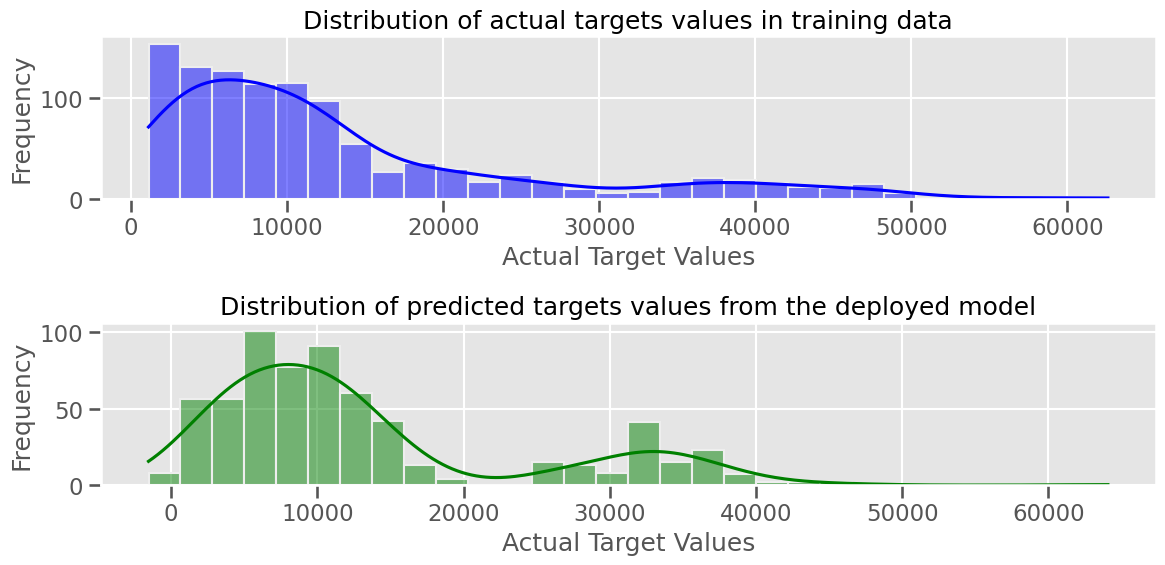

In [97]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for visualization enhancements

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Plot the distribution of targets in the training data
plt.subplot(211)
sns.histplot(x=ytrain, kde= True, bins=30, color='blue')
plt.title("Distribution of actual targets values in training data")
plt.xlabel("Actual Target Values")
plt.ylabel("Frequency")

# Plot the distribution of predicted targets from the deployed model
plt.subplot(212)
sns.histplot(prediction_logs_sample_df.prediction,  kde= True, bins=30, color='green')
plt.title("Distribution of predicted targets values from the deployed model")
plt.xlabel("Actual Target Values")
plt.ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [98]:
# Calculate mean of actual values in training data (sum(target y) / len(target y))
mean_training_data = sum(ytrain) / len(ytrain)

In [99]:
# Calculate mean of predicted values in sample logs (sum(logs.prediction) / len(logs.prediction))
mean_sample_logs = sum(prediction_logs_sample_df.prediction) / len(prediction_logs_sample_df.prediction)

In [100]:
# Calculate variance of actual values in training data
variance = sum((y - mean_training_data)**2 for y in ytrain) / len(ytrain)

In [101]:
# Calculate absolute difference between means
diff = abs(mean_training_data - mean_sample_logs)

In [102]:
# Check for model drift
if diff > 2 * math.sqrt(variance):
    print("Model Drift Detected!")
else:
    print("No Model Drift!")

No Model Drift!


In [103]:
# @title Target Check

mean_training_data = 0.1127 # @param
mean_sample_logs = 0.16 # @param
training_data_size = 41183 # @param

variance = sum((y - mean_training_data)**2 for y in ytrain) / training_data_size
# variance = (mean_training_data * (1-mean_training_data))/training_data_size
diff = abs(mean_training_data - mean_sample_logs)

if diff > 2 * math.sqrt(variance):
    print("Model Drift Detected!")
else:
    print("No Model Drift!")


No Model Drift!


## Data Drift Checks

### Live Features vs Training Features

In [104]:
mean_age_training_data = Xtrain['age'].mean()
std_age_training_data = Xtrain['age'].std()

mean_age_sample_logs = prediction_logs_sample_df['age'].mean()

In [105]:
(mean_age_training_data, mean_age_sample_logs)

(39.357009345794395, 38.53375196232339)

In [106]:
mean_feature_training_data = 39.35
mean_feature_sample_logs = 37.04
std_feature_training_data = 14.07

mean_diff = abs(mean_age_training_data - mean_age_sample_logs)

if mean_diff > 2 * std_feature_training_data:
    print("Data Drift Detected!")
else:
    print("No Data Drift!")

No Data Drift!


In [107]:
std_age_training_data

14.073960139337272

In [108]:
# @title Feature Distribution Check

mean_feature_training_data = 40.020 # @param
mean_feature_sample_logs = 39.493 # @param
std_feature_training_data = 10.435 # @param

mean_diff = abs(mean_feature_training_data - mean_feature_sample_logs)

if mean_diff > 2 * std_feature_training_data:
    print("Data Drift Detected!")
else:
    print("No Data Drift!")


No Data Drift!


The current model stays in production unless we detect model drift or data drift.

# Convert ipynb to HTML

Instructions:
1. Go to File
2. Download these current working Notebook in to ipynb format
3. Now, run the below code, select the notebook from local where you downloaded the file
4. Wait for few sec, your notebook will automatically converted in to html format and save in your local pc


In [ ]:
# @title HTML Convert
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html"
files.download(file0[:-5]+"html")


## Power Ahead!